# Human learning

# Colab

https://drive.google.com/file/d/1P3aYu5kdMLOVxgl2K6wjzx-HtWB5J_wu/view?usp=sharing
https://www.kaggle.com/datasets/abdelrahmankhalil/100000-uk-used-car-data-set

#### Загрузка с гугл диска для колаб

In [1]:
! gdown --id 1P3aYu5kdMLOVxgl2K6wjzx-HtWB5J_wu

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


#### Разархивирование в новую папку

In [2]:
! unzip / content / uk_used_cars.zip -d / content / uk_used_cars /

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [11]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/uk_used_cars/bmw.csv')

In [5]:
df.head()

NameError: name 'df' is not defined

# Pycharm

In [1]:
from zipfile import ZipFile

with ZipFile('uk_used_cars.zip', 'r') as zf:
    zf.extractall()

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bmw.csv')

#### Суть human learning в данном датасете:
##### Создание алгоритма для определения цены по параметрам автомобиля (модель, год, пробег и т.д.)

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
df.shape

(10781, 9)

## Обучающая и тестовая выборка (train and test)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# train, test = train_test_split(df, train_size=0.7)

##### Случайное разбиение на подвыборки по дефолту
##### random_state - фиксация рандома с помощью числа

In [7]:
train, test = train_test_split(df, random_state=42)  # default train_size = 0.75

In [8]:
len(train), len(test), len(test + train), len(df)

(8085, 2696, 10781, 10781)

In [9]:
len(test) / len(df)

0.2500695668305352

## Анализ данных

##### Пропуски отстутствуют

In [10]:
train.isna().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [11]:
df.isna().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [12]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5


In [13]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-colorblind')

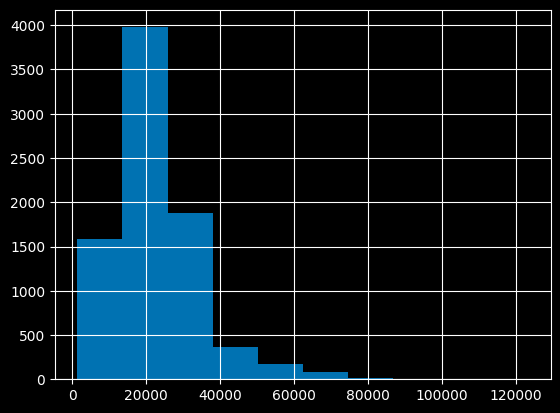

In [14]:
train.price.hist();

In [15]:
train.price.describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

#### Гипотеза: чем новее автомобиль, тем он дороже

In [16]:
train.groupby('year')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


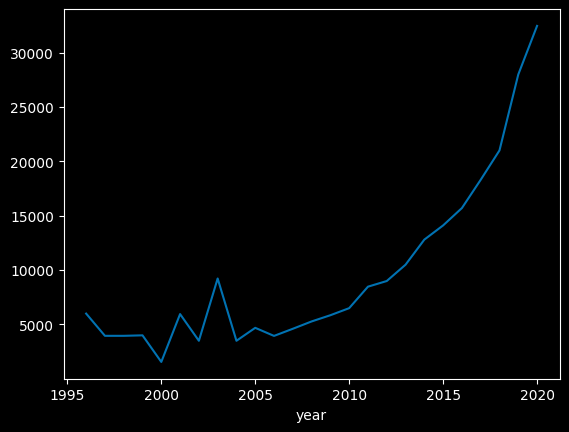

In [17]:
train.groupby('year')['price'].median().plot();

##### График подтверждает гипотезу

## Baseline

##### Создание простейшего алгоритма, который будет сравнивать стоимость машины со средней стоимостью всех машин

In [18]:
train.price.describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

##### Создание колонки средней стоимости автомобиля

In [19]:
train['price_pred_mean'] = train.price.mean()

In [20]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645


##### Создание колонки ошибки

In [21]:
train['err'] = train['price_pred_mean'] - train['price']  # Ошибка - в данном случае отклонение от среднего

In [22]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645


##### Создание колонки АБСОЛЮТНОЙ ошибки

In [23]:
train['err_abs'] = abs(train['err'])  # абсолютная ошибка

In [24]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645


##### В среднем предсказание по ДАННОМУ алгоритму ОШИБАЕТСЯ на ≈ 8450

In [25]:
train.err_abs.mean()

8450.556631461715

In [26]:
train['err_abs_pct'] = (train.err_abs / train.price)

In [27]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212


##### Средний процент ошибки - 48.3%

In [28]:
train.err_abs_pct.mean()

0.48316912602731443

##### Создание колонки медианной стоимости автомобиля

In [29]:
train['price_pred_median'] = train.price.median()

In [30]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0


##### Используем встроенные функции sklearn для вычисления ошибок

In [31]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

##### Вычислим среднюю абсолютную ошибку и процент по ней, через функции

In [32]:
mean_absolute_error(train.price, train.price_pred_mean)

8450.556631461715

In [33]:
mean_absolute_percentage_error(train.price, train.price_pred_mean)

0.48316912602731443

##### Теперь посчитаем для медианы

In [34]:
mean_absolute_error(train.price, train.price_pred_median)

8220.5146567718

In [35]:
mean_absolute_percentage_error(train.price, train.price_pred_median)

0.41711111879393314

#### Для baseline`а лучше использовать медиану, т.к. она даёт меньшую ошибку, то есть лучшее качество

##### Попробуем спрогнозировать ошибку на тестовой части

In [36]:
test['price_pred_median'] = train.price.median()  # Пишем именно train, т.к. мы обучаемся на train`е

In [37]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0


In [38]:
mean_absolute_error(test.price, test.price_pred_median)

8211.845697329376

In [39]:
mean_absolute_percentage_error(test.price, test.price_pred_median)

0.409212791738344

##### На тестовой части ошибка оказалась +- такой же как и на трейне

## Алгоритм на основе года

##### Суть: Предсказать стоимость машины на основе средней стоимости для её года

In [40]:
train.groupby('year')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


##### Создание датафрейма со средней стоимостью по годам

In [41]:
model_year_mean = train.groupby('year').price.mean().reset_index()

In [42]:
model_year_mean

,year,price
0,1996,5995.000000
1,1997,3950.000000
2,1998,3950.000000
3,1999,3980.000000
4,2000,1550.000000
5,2001,7333.333333
6,2002,3893.500000
7,2003,9222.500000
8,2004,7932.857143
9,2005,5390.166667


In [43]:
model_year_mean.columns

Index(['year', 'price'], dtype='object')

In [44]:
model_year_mean.columns = ['year', 'price_pred_year_mean']

In [45]:
model_year_mean

,year,price_pred_year_mean
0,1996,5995.000000
1,1997,3950.000000
2,1998,3950.000000
3,1999,3980.000000
4,2000,1550.000000
5,2001,7333.333333
6,2002,3893.500000
7,2003,9222.500000
8,2004,7932.857143
9,2005,5390.166667


##### Джойним даный датафрейм к трейну

In [46]:
train = train.merge(model_year_mean, how='left', on='year')

In [47]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313


##### Ошибка значительно СНИЗИЛАСЬ относительно train baseline

In [48]:
mean_absolute_error(train.price, train.price_pred_year_mean)

5474.243598515644

In [49]:
mean_absolute_percentage_error(train.price, train.price_pred_year_mean)

0.2447228468704618

##### Проверим то же самое на тесте

In [50]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0


In [51]:
test = test.merge(model_year_mean, how='left', on='year')

In [52]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394


In [53]:
test.isna().mean()  # Проверка на пропуски

model                   0.0
year                    0.0
price                   0.0
transmission            0.0
mileage                 0.0
fuelType                0.0
tax                     0.0
mpg                     0.0
engineSize              0.0
price_pred_median       0.0
price_pred_year_mean    0.0
dtype: float64

In [54]:
mean_absolute_error(test.price, test.price_pred_year_mean)

5426.271071211102

In [55]:
mean_absolute_percentage_error(test.price, test.price_pred_year_mean)

0.23933940428873632

#### Большие улучшения по сравнению с test baseline↓: MAE(8211 → 5426), MAPE(0.409 → 0.239)

In [56]:
mean_absolute_error(test.price, test.price_pred_median)

8211.845697329376

In [57]:
mean_absolute_percentage_error(test.price, test.price_pred_median)

0.409212791738344

## Алгоритм: медиана по году

##### Суть: Предсказать стоимость машины на основе медианной стоимости для её года

##### Создание датафрейма с медианной стоимостью по годам

In [58]:
model_year_median = train.groupby('year')['price'].median().reset_index()

In [59]:
model_year_median

,year,price
0,1996,5995.0
1,1997,3950.0
2,1998,3950.0
3,1999,3995.0
4,2000,1550.0
5,2001,5950.0
6,2002,3494.5
7,2003,9222.5
8,2004,3495.0
9,2005,4685.0


In [60]:
model_year_median.columns

Index(['year', 'price'], dtype='object')

In [61]:
model_year_median = model_year_median.rename({'price': 'price_pred_year_median'}, axis=1)

In [62]:
model_year_median

,year,price_pred_year_median
0,1996,5995.0
1,1997,3950.0
2,1998,3950.0
3,1999,3995.0
4,2000,1550.0
5,2001,5950.0
6,2002,3494.5
7,2003,9222.5
8,2004,3495.0
9,2005,4685.0


In [63]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313


In [64]:
train = train.merge(model_year_median, how='left', on='year')

In [65]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0,22562.450394,21000.0
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0,16531.655222,15699.5
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0,31066.986143,27980.0
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0,16531.655222,15699.5


In [66]:
mean_absolute_error(train.price, train.price_pred_year_median)

5232.327891156463

In [67]:
mean_absolute_percentage_error(train.price, train.price_pred_year_median)

0.21723436816638503

##### Проверим то же самое на тесте

In [68]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394


In [69]:
test = test.merge(model_year_median, how='left', on='year')

In [70]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394,21000.0
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333,12797.5
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143,27980.0
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143,27980.0
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394,21000.0


In [71]:
test.isna().mean()  # Проверка на пропуски

model                     0.0
year                      0.0
price                     0.0
transmission              0.0
mileage                   0.0
fuelType                  0.0
tax                       0.0
mpg                       0.0
engineSize                0.0
price_pred_median         0.0
price_pred_year_mean      0.0
price_pred_year_median    0.0
dtype: float64

In [72]:
mean_absolute_error(test.price, test.price_pred_year_median)

5240.677299703264

In [73]:
mean_absolute_percentage_error(test.price, test.price_pred_year_median)

0.21478293590399475

#### Улучшения относительно среднего↓: MAE(5426 → 5240), MAPE(0.239 → 0.214)

In [74]:
mean_absolute_error(test.price, test.price_pred_year_mean)

5426.271071211102

In [75]:
mean_absolute_percentage_error(test.price, test.price_pred_year_mean)

0.23933940428873632

## Добавляем ещё одну переменную

In [76]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5


##### Возьмём переменную объём двигателя
#### Гипотеза: чем больше объём двигателя, тем дороже стоит машина

In [77]:
train.groupby('engineSize').price.agg(['count', 'mean', 'median'])

,count,mean,median
engineSize,,,
0.0,32,18469.906250,18250.0
0.6,6,17973.333333,18200.0
1.0,1,17400.000000,17400.0
1.5,1146,17104.345550,15881.5
1.6,75,9230.240000,8890.0
1.9,5,3968.000000,3950.0
2.0,4925,20697.721624,19792.0
2.2,4,6010.000000,3972.5
2.5,8,4532.375000,3892.5


In [78]:
train.groupby('engineSize')[['price', 'year']].agg(['count', 'mean', 'median'])

price                         year                     
           count          mean   median count         mean  median
engineSize                                                        
0.0           32  18469.906250  18250.0    32  2015.843750  2017.0
0.6            6  17973.333333  18200.0     6  2016.333333  2016.5
1.0            1  17400.000000  17400.0     1  2015.000000  2015.0
1.5         1146  17104.345550  15881.5  1146  2017.582024  2017.0
1.6           75   9230.240000   8890.0    75  2013.626667  2014.0
1.9            5   3968.000000   3950.0     5  1998.400000  1999.0
2.0         4925  20697.721624  19792.0  4925  2017.068629  2017.0
2.2            4   6010.000000   3972.5     4  2003.250000  2003.0
2.5            8   4532.375000   3892.5     8  2005.250000  2005.5
2.8            1   5995.000000   5995.0     1  1996.000000  1996.0
3.0         1818  31545.723872  27058.0  1818  2017.116062  2017.0
3.2            3  16116.333333  17850.0     3  2004.333333  2004.0
3.5            1   6990.000000   6990.0     1  2002.000000  2002.0
4.0            4  18012.250000  17700.0     4  2010.500000  2010.0
4.4           54  49960.666667  45904.5    54  2017.129630  2018.0
5.0            1  12495.000000  12495.0     1  2006.000000  2006.0
6.6            1  57000.000000  57000.0     1  2017.000000  2017.0

In [79]:
def engine_group(x):
    if x <= 1.5:
        return '<=1.5'
    if x <= 2:
        return '<=2'
    return '>2'

In [80]:
train['engine_group'] = train.engineSize.apply(engine_group)

In [81]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5


#### Гипотеза оказалась верна

In [82]:
t = train.groupby('engine_group').price.agg(['count', 'mean', 'median'])

In [83]:
t

,count,mean,median
engine_group,,,
<=1.5,1185,17145.870886,15980.0
<=2,5005,20509.168232,19499.0
>2,1895,31826.479683,27500.0


In [84]:
t['count'].sum()

8085

In [85]:
len(train)

8085

##### Для примера, та же операция разбивки данных на группы, <=1.5, <=2 и >2 с помощью pd.cut

In [86]:
pd.cut(train['engineSize'], [0, 1.5, 2, float('inf')])

0       (1.5, 2.0]
1       (0.0, 1.5]
2       (2.0, inf]
3       (1.5, 2.0]
4       (0.0, 1.5]
           ...    
8080    (1.5, 2.0]
8081    (2.0, inf]
8082    (1.5, 2.0]
8083    (1.5, 2.0]
8084    (0.0, 1.5]
Name: engineSize, Length: 8085, dtype: category
Categories (3, interval[float64, right]): [(0.0, 1.5] < (1.5, 2.0] < (2.0, inf]]

In [87]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5


In [88]:
train['engine_group2'] = pd.cut(train['engineSize'], [-float('inf'), 1.5, 2, float('inf')])

In [89]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,engine_group2
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2,"(1.5, 2.0]"
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5,"(-inf, 1.5]"
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2,"(2.0, inf]"
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2,"(1.5, 2.0]"
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5,"(-inf, 1.5]"


##### Результат один и тот же

In [90]:
train.groupby('engine_group2').price.agg(['count', 'mean', 'median'])

,count,mean,median
engine_group2,,,
"(-inf, 1.5]",1185,17145.870886,15980.0
"(1.5, 2.0]",5005,20509.168232,19499.0
"(2.0, inf]",1895,31826.479683,27500.0


In [91]:
t

,count,mean,median
engine_group,,,
<=1.5,1185,17145.870886,15980.0
<=2,5005,20509.168232,19499.0
>2,1895,31826.479683,27500.0


##### Создание датафрейма с медианной стоимостью по годам и по объёму двигателя

In [92]:
model_year_engine_median = train.groupby(['year', 'engine_group'])['price'].median().reset_index()

In [93]:
model_year_engine_median

,year,engine_group,price
0,1996,>2,5995.0
1,1997,<=2,3950.0
2,1998,<=2,3950.0
3,1999,<=2,3995.0
4,2000,>2,1550.0
5,2001,<=1.5,13000.0
6,2001,>2,4500.0
7,2002,<=2,3999.0
8,2002,>2,2990.0
9,2003,>2,9222.5


##### В старых годах представленны не все движки

In [94]:
train.groupby(['year', 'engine_group'])['price'].count()

year  engine_group
1996  >2                 1
1997  <=2                1
1998  <=2                1
1999  <=2                3
2000  >2                 1
2001  <=1.5              1
      >2                 2
2002  <=2                1
      >2                 3
2003  >2                 2
2004  <=2                2
      >2                 5
2005  <=2                3
      >2                 3
2006  <=2                6
      >2                 6
2007  <=2                7
      >2                 5
2008  <=2               10
      >2                 8
2009  <=2               15
      >2                 7
2010  <=2               21
      >2                10
2011  <=2               28
      >2                 9
2012  <=2               75
      >2                17
2013  <=2              211
      >2                42
2014  <=1.5              4
      <=2              290
      >2                90
2015  <=1.5             83
      <=2              453
      >2               180
2016  <=1

##### Создание сводника

In [95]:
train.pivot_table(index='year', columns='engine_group', values='price', aggfunc='median')

engine_group,<=1.5,<=2,>2
year,,,
1996,NaN,NaN,5995.0
1997,NaN,3950.0,NaN
1998,NaN,3950.0,NaN
1999,NaN,3995.0,NaN
2000,NaN,NaN,1550.0
2001,13000.0,NaN,4500.0
2002,NaN,3999.0,2990.0
2003,NaN,NaN,9222.5
2004,NaN,1970.0,8750.0


##### Для лучшего восприятия создадим heatmap

In [96]:
import seaborn as sns

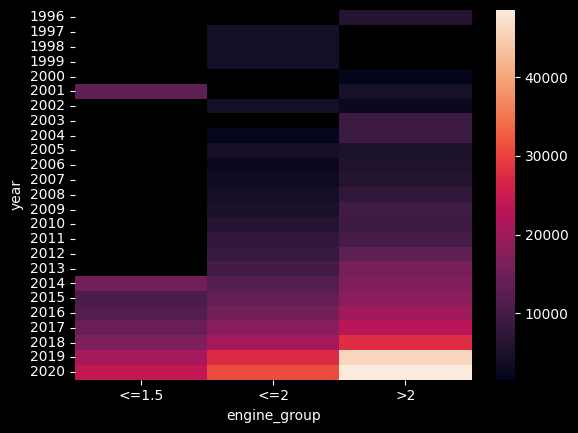

In [97]:
sns.heatmap(train.pivot_table(index='year', columns='engine_group', values='price', aggfunc='median'));

##### Модель работает верно: чем новее автомобиль и чем больше объём двигателя, тем выше его стоимость

In [98]:
model_year_engine_median = model_year_engine_median.rename({'price': 'price_pred_year_engine_median'}, axis=1)

In [99]:
model_year_engine_median

,year,engine_group,price_pred_year_engine_median
0,1996,>2,5995.0
1,1997,<=2,3950.0
2,1998,<=2,3950.0
3,1999,<=2,3995.0
4,2000,>2,1550.0
5,2001,<=1.5,13000.0
6,2001,>2,4500.0
7,2002,<=2,3999.0
8,2002,>2,2990.0
9,2003,>2,9222.5


##### Смёрджим новую таблицу с трейном

In [100]:
train = train.merge(model_year_engine_median, how='left', on=['year', 'engine_group'])

In [101]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,engine_group2,price_pred_year_engine_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2,"(1.5, 2.0]",9990.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5,"(-inf, 1.5]",20980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2,"(2.0, inf]",18144.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2,"(1.5, 2.0]",27294.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5,"(-inf, 1.5]",10999.0


In [102]:
mean_absolute_error(train.price, train.price_pred_year_engine_median)

3659.774273345702

In [103]:
mean_absolute_percentage_error(train.price, train.price_pred_year_engine_median)

0.1582922021242831

##### Проверим то же на тесте

In [104]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394,21000.0
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333,12797.5
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143,27980.0
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143,27980.0
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394,21000.0


##### Сначала добавим engine_group в test

In [105]:
test['engine_group'] = test.engineSize.apply(engine_group)

In [106]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394,21000.0,<=1.5
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333,12797.5,<=2
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143,27980.0,>2
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143,27980.0,<=1.5
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394,21000.0,<=1.5


In [107]:
test = test.merge(model_year_engine_median, how='left', on=['year', 'engine_group'])

In [108]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_median
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394,21000.0,<=1.5,16500.0
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333,12797.5,<=2,11945.0
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143,27980.0,>2,45980.0
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143,27980.0,<=1.5,20980.0
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394,21000.0,<=1.5,16500.0


#### В тесте обнаружились пропуски, это значит, что в тесте не было автомобиля такого года/объёма двигателя, которые были в обучающей выборке

In [109]:
test.isna().mean()

model                            0.000000
year                             0.000000
price                            0.000000
transmission                     0.000000
mileage                          0.000000
fuelType                         0.000000
tax                              0.000000
mpg                              0.000000
engineSize                       0.000000
price_pred_median                0.000000
price_pred_year_mean             0.000000
price_pred_year_median           0.000000
engine_group                     0.000000
price_pred_year_engine_median    0.000742
dtype: float64

##### Поиск пропущенных значений

In [110]:
test[test.price_pred_year_engine_median.isna()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_median
415,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,20022.0,3980.0,3995.0,>2,NaN
2255,5 Series,2000,1699,Manual,99209,Petrol,265,29.4,2.0,20022.0,1550.0,1550.0,<=2,NaN


##### Создадим функцию, чтобы каждый раз не копировать одни и те же ячейки

In [111]:
def error(y_true, y_pred):
    print(mean_absolute_error(y_true, y_pred))
    print(mean_absolute_percentage_error(y_true, y_pred))

##### Тестирование функции, сверим значения функции и предыдущих ячеек

In [112]:
error(train.price, train.price_pred_year_engine_median)

3659.774273345702
0.1582922021242831


In [113]:
mean_absolute_error(train.price, train.price_pred_year_engine_median)

3659.774273345702

In [114]:
mean_absolute_percentage_error(train.price, train.price_pred_year_engine_median)

0.1582922021242831

##### Теперь будем использовать функцию для теста.
##### Т.к. в данных теста было 2 пропуска, их придётся убрать из датасета.
##### Создадим доп. датасет без пропусков

In [115]:
test_no_nan = test.dropna().copy()

In [116]:
test.shape, test_no_nan.shape  # Видим как дропнулись 2 пропущенных значения

((2696, 14), (2694, 14))

In [117]:
error(test_no_nan.price, test_no_nan.price_pred_year_engine_median)

3790.014291017075
0.16270961023342095


#### Улучшения относительно медианы по году↓: MAE(5240 → 3790), MAPE(0.214 → 0.162)

In [118]:
error(test.price, test.price_pred_year_median)

5240.677299703264
0.21478293590399475


## Улучшение модели

In [119]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,engine_group2,price_pred_year_engine_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2,"(1.5, 2.0]",9990.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5,"(-inf, 1.5]",20980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2,"(2.0, inf]",18144.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2,"(1.5, 2.0]",27294.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5,"(-inf, 1.5]",10999.0


##### В данной модели уже 51 условие. А если добавить трансмиссию, то будет около 150 условий
##### Выборка содержит мало автомобилей старше ≈2010 года, по этому имеет смысл разделить автомобили на несколько групп по годам

In [120]:
train.groupby('transmission').price.agg(['count', 'mean', 'median'])

,count,mean,median
transmission,,,
Automatic,2698,22413.452187,19392.0
Manual,1925,14557.851429,13450.0
Semi-Auto,3462,27377.835066,24990.0


In [121]:
train.groupby('year').price.agg(['count', 'median'])

,count,median
year,,
1996,1,5995.0
1997,1,3950.0
1998,1,3950.0
1999,3,3995.0
2000,1,1550.0
2001,3,5950.0
2002,4,3494.5
2003,2,9222.5
2004,7,3495.0


##### Разделим ДФ на группы по годам

In [122]:
train['year_group'] = pd.cut(train['year'], [0, 2010, 2012, 2014, 2016, 2018, float('inf')])

In [123]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,engine_group2,price_pred_year_engine_median,year_group
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2,"(1.5, 2.0]",9990.0,"(2012.0, 2014.0]"
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5,"(-inf, 1.5]",20980.0,"(2018.0, inf]"
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2,"(2.0, inf]",18144.5,"(2014.0, 2016.0]"
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2,"(1.5, 2.0]",27294.0,"(2018.0, inf]"
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5,"(-inf, 1.5]",10999.0,"(2014.0, 2016.0]"


In [124]:
train.groupby('year_group').price.agg(['count', 'mean', 'median'])

,count,mean,median
year_group,,,
"(0.0, 2010.0]",124,6264.258065,5584.0
"(2010.0, 2012.0]",129,9268.682171,8985.0
"(2012.0, 2014.0]",637,12470.036107,11695.0
"(2014.0, 2016.0]",2114,16042.201514,15080.5
"(2016.0, 2018.0]",1931,20309.644744,19370.0
"(2018.0, inf]",3150,31819.188571,28867.5


In [125]:
train.groupby(['year_group', 'engine_group']).price.agg(['count', 'median'])

count   median
year_group       engine_group                
(0.0, 2010.0]    <=1.5             1  13000.0
                 <=2              70   4097.0
                 >2               53   6990.0
(2010.0, 2012.0] <=1.5             0      NaN
                 <=2             103   8470.0
                 >2               26  12245.0
(2012.0, 2014.0] <=1.5             4  14972.5
                 <=2             501  10998.0
                 >2              132  16345.0
(2014.0, 2016.0] <=1.5           369  11557.0
                 <=2            1269  14800.0
                 >2              476  19497.5
(2016.0, 2018.0] <=1.5           349  14999.0
                 <=2            1107  18980.0
                 >2              475  24480.0
(2018.0, inf]    <=1.5           462  21500.0
                 <=2            1955  27990.0
                 >2              733  46000.0

##### Создадим новый ДС с группировкой по годам и двигателям

In [126]:
model_year_engine_group_median = train.groupby(['year_group', 'engine_group']).price.median().reset_index()

In [127]:
model_year_engine_group_median

,year_group,engine_group,price
0,"(0.0, 2010.0]",<=1.5,13000.0
1,"(0.0, 2010.0]",<=2,4097.0
2,"(0.0, 2010.0]",>2,6990.0
3,"(2010.0, 2012.0]",<=1.5,NaN
4,"(2010.0, 2012.0]",<=2,8470.0
5,"(2010.0, 2012.0]",>2,12245.0
6,"(2012.0, 2014.0]",<=1.5,14972.5
7,"(2012.0, 2014.0]",<=2,10998.0
8,"(2012.0, 2014.0]",>2,16345.0
9,"(2014.0, 2016.0]",<=1.5,11557.0


##### Переименнуем переменную в датасете во избежание повторений при мёрдже

In [128]:
model_year_engine_group_median = model_year_engine_group_median.rename({'price': 'price_year_engine_group_median'},
                                                                       axis=1)

In [129]:
model_year_engine_group_median

,year_group,engine_group,price_year_engine_group_median
0,"(0.0, 2010.0]",<=1.5,13000.0
1,"(0.0, 2010.0]",<=2,4097.0
2,"(0.0, 2010.0]",>2,6990.0
3,"(2010.0, 2012.0]",<=1.5,NaN
4,"(2010.0, 2012.0]",<=2,8470.0
5,"(2010.0, 2012.0]",>2,12245.0
6,"(2012.0, 2014.0]",<=1.5,14972.5
7,"(2012.0, 2014.0]",<=2,10998.0
8,"(2012.0, 2014.0]",>2,16345.0
9,"(2014.0, 2016.0]",<=1.5,11557.0


##### Смёрждим датасет

In [130]:
train = train.merge(model_year_engine_group_median, how='left', on=['year_group', 'engine_group'])

In [131]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,...,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,engine_group2,price_pred_year_engine_median,year_group,price_year_engine_group_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,...,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2,"(1.5, 2.0]",9990.0,"(2012.0, 2014.0]",10998.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,...,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5,"(-inf, 1.5]",20980.0,"(2018.0, inf]",21500.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,...,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2,"(2.0, inf]",18144.5,"(2014.0, 2016.0]",19497.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,...,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2,"(1.5, 2.0]",27294.0,"(2018.0, inf]",27990.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,...,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5,"(-inf, 1.5]",10999.0,"(2014.0, 2016.0]",11557.0


In [132]:
# train = train.drop(['price_year_engine_group_median_x', 'price_year_engine_group_median_y'], axis=1)

##### Теряем в качестве на трейне, т.к. стало меньше групп
inf - 2010, 2010 - 2015, 2015 - inf. MAE 6252, MAPE 0.283
inf - 2010, каждые 2 года, 2018 - inf. MAE 3827 MAPE 0.169

##### После того, как данные были разбиты на достаточное количество групп, модель сильно упростилась, но при этом почти не потеряла в качестве

In [133]:
error(train.price, train.price_year_engine_group_median)

3827.4336425479282
0.1693848259731495


In [134]:
error(train.price, train.price_pred_year_engine_median)  # Вариант без группировки по годам

3659.774273345702
0.1582922021242831


##### Для улучшения модели добавим группировку по трансмиссии

In [135]:
model_year_engine_trn_group_median = (train.groupby(['year_group', 'engine_group', 'transmission'])
                                      .price.median()
                                      .reset_index())

In [136]:
model_year_engine_trn_group_median

,year_group,engine_group,transmission,price
0,"(0.0, 2010.0]",<=1.5,Automatic,NaN
1,"(0.0, 2010.0]",<=1.5,Manual,13000.0
2,"(0.0, 2010.0]",<=1.5,Semi-Auto,NaN
3,"(0.0, 2010.0]",<=2,Automatic,5982.5
4,"(0.0, 2010.0]",<=2,Manual,3995.0
5,"(0.0, 2010.0]",<=2,Semi-Auto,5695.0
6,"(0.0, 2010.0]",>2,Automatic,5997.0
7,"(0.0, 2010.0]",>2,Manual,8800.0
8,"(0.0, 2010.0]",>2,Semi-Auto,10995.0
9,"(2010.0, 2012.0]",<=1.5,Automatic,NaN


In [137]:
# pd.options.display.max_rows = 999  # Настройка вывода количества строк для Colab

##### Nan\`ы появляются из-за интервальной переменной, если же сделать группировку по годам, то Nan`ов не будет

In [138]:
(train.groupby(['year',
                'engine_group',
                'transmission'])
 .price.median()
 .reset_index())

,year,engine_group,transmission,price
0,1996,>2,Automatic,5995.0
1,1997,<=2,Manual,3950.0
2,1998,<=2,Manual,3950.0
3,1999,<=2,Manual,3995.0
4,2000,>2,Automatic,1550.0
...,...,...,...,...
107,2020,<=2,Automatic,34550.0
108,2020,<=2,Manual,24240.0
109,2020,<=2,Semi-Auto,31233.0
110,2020,>2,Automatic,44899.0


##### Переименнуем прайс во избежания повторений (_x, _y)

In [139]:
model_year_engine_trn_group_median = (model_year_engine_trn_group_median
                                      .rename({'price': 'price_pred_year_engine_trn_median'}, axis=1))

In [140]:
model_year_engine_trn_group_median

,year_group,engine_group,transmission,price_pred_year_engine_trn_median
0,"(0.0, 2010.0]",<=1.5,Automatic,NaN
1,"(0.0, 2010.0]",<=1.5,Manual,13000.0
2,"(0.0, 2010.0]",<=1.5,Semi-Auto,NaN
3,"(0.0, 2010.0]",<=2,Automatic,5982.5
4,"(0.0, 2010.0]",<=2,Manual,3995.0
5,"(0.0, 2010.0]",<=2,Semi-Auto,5695.0
6,"(0.0, 2010.0]",>2,Automatic,5997.0
7,"(0.0, 2010.0]",>2,Manual,8800.0
8,"(0.0, 2010.0]",>2,Semi-Auto,10995.0
9,"(2010.0, 2012.0]",<=1.5,Automatic,NaN


##### Мёрджим ДФ на трейне

In [141]:
train = train.merge(model_year_engine_trn_group_median, how='left', on=['year_group',
                                                                'engine_group',
                                                                'transmission'])

In [142]:
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,...,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,engine_group2,price_pred_year_engine_median,year_group,price_year_engine_group_median,price_pred_year_engine_trn_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,...,0.772248,20022.0,11041.347826,10490.0,<=2,"(1.5, 2.0]",9990.0,"(2012.0, 2014.0]",10998.0,12655.5
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,...,0.055269,20022.0,31066.986143,27980.0,<=1.5,"(-inf, 1.5]",20980.0,"(2018.0, inf]",21500.0,21950.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,...,0.127955,20022.0,15086.536313,14103.5,>2,"(2.0, inf]",18144.5,"(2014.0, 2016.0]",19497.5,19245.0
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,...,0.093247,20022.0,31066.986143,27980.0,<=2,"(1.5, 2.0]",27294.0,"(2018.0, inf]",27990.0,28850.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,...,1.070212,20022.0,15086.536313,14103.5,<=1.5,"(-inf, 1.5]",10999.0,"(2014.0, 2016.0]",11557.0,11000.5


##### Небольшое улучшение на трейне, относительно варианта без группировки по годам и без трансмиссии

In [143]:
error(train.price, train.price_pred_year_engine_trn_median)  # Вариант группировка + трансмиссия

3635.5412492269634
0.1561691679065392


In [144]:
error(train.price, train.price_pred_year_engine_median)  # Вариант без группировки по годам

3659.774273345702
0.1582922021242831


##### Проверим то же самое на тесте
##### Для этого нужно добавить группы по годам в тест

In [145]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_median
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394,21000.0,<=1.5,16500.0
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333,12797.5,<=2,11945.0
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143,27980.0,>2,45980.0
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143,27980.0,<=1.5,20980.0
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394,21000.0,<=1.5,16500.0


In [146]:
test['year_group'] = pd.cut(test['year'], [0, 2010, 2012, 2014, 2016, 2018, float('inf')])

In [147]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_median,year_group
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394,21000.0,<=1.5,16500.0,"(2016.0, 2018.0]"
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333,12797.5,<=2,11945.0,"(2012.0, 2014.0]"
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143,27980.0,>2,45980.0,"(2018.0, inf]"
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143,27980.0,<=1.5,20980.0,"(2018.0, inf]"
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394,21000.0,<=1.5,16500.0,"(2016.0, 2018.0]"


##### Мёрджим ДФ с тестом

In [148]:
test = test.merge(model_year_engine_trn_group_median, how='left', on=['year_group',
                                                                'engine_group',
                                                                'transmission'])

In [149]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_median,year_group,price_pred_year_engine_trn_median
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0,22562.450394,21000.0,<=1.5,16500.0,"(2016.0, 2018.0]",13980.0
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0,13411.333333,12797.5,<=2,11945.0,"(2012.0, 2014.0]",12655.5
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0,31066.986143,27980.0,>2,45980.0,"(2018.0, inf]",46991.0
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0,31066.986143,27980.0,<=1.5,20980.0,"(2018.0, inf]",21450.0
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0,22562.450394,21000.0,<=1.5,16500.0,"(2016.0, 2018.0]",13980.0


##### Проверка на пропуски

In [150]:
test.isna().mean()

model                                0.000000
year                                 0.000000
price                                0.000000
transmission                         0.000000
mileage                              0.000000
fuelType                             0.000000
tax                                  0.000000
mpg                                  0.000000
engineSize                           0.000000
price_pred_median                    0.000000
price_pred_year_mean                 0.000000
price_pred_year_median               0.000000
engine_group                         0.000000
price_pred_year_engine_median        0.000742
year_group                           0.000000
price_pred_year_engine_trn_median    0.001113
dtype: float64

In [151]:
test[test.price_pred_year_engine_trn_median.isna()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_median,year_group,price_pred_year_engine_trn_median
248,1 Series,2011,20999,Manual,14200,Petrol,145,36.2,3.0,20022.0,8860.297297,8470.0,>2,10500.0,"(2010.0, 2012.0]",NaN
692,Z4,2011,10450,Manual,64250,Petrol,305,33.2,2.5,20022.0,8860.297297,8470.0,>2,10500.0,"(2010.0, 2012.0]",NaN
2099,Z4,2011,12995,Manual,26000,Petrol,300,33.2,2.5,20022.0,8860.297297,8470.0,>2,10500.0,"(2010.0, 2012.0]",NaN


In [152]:
test[test.price_pred_year_engine_median.isna()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_median,year_group,price_pred_year_engine_trn_median
415,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,20022.0,3980.0,3995.0,>2,NaN,"(0.0, 2010.0]",5997.0
2255,5 Series,2000,1699,Manual,99209,Petrol,265,29.4,2.0,20022.0,1550.0,1550.0,<=2,NaN,"(0.0, 2010.0]",3995.0


##### Т.к. пропущенных значений мало (всего 5), то имеет смысл их дропнуть

In [153]:
test_no_na = test.dropna().copy()

##### Посчитаем ошибку на тесте

In [154]:
error(test_no_na.price, test_no_na.price_pred_year_engine_trn_median)

3777.5172798216277
0.16037327734163415


#### Незначительные улучшения относительно варианта без группировки и трансмиссии ↓: MAE(3789 → 3777), MAPE(0.1626 → 0.1603)

In [155]:
error(test_no_na.price, test_no_na.price_pred_year_engine_median) # Вариант без группировки по годам

3789.392233370494
0.1626320818166501


## Итого:
#### В данном примере был показан принцип создания ручных моделей (rule based), т.к. Модели основаны на простых правилах (закономерностях), например в данном ДС: чем новее машина, тем она дороже и чем больше объём двигателя, тем дороже машина.
### Результат: Baseline модель основанная на средней стоимости автомобиля могла предсказать стоимость автомобиля с абсолютной ошибкой MAE в 8450 £ и MAPE 0.483, то есть абсолютная ошибка в процентах составила 48.3% от стоимости автомобиля.
### Доработанная модель, основанная на: медианной стоимости, объёме двигателя, разбивке по годам (раз в 2 года с 2010) и типе трансмиссии могла предсказать стоимость автомобиля с абсолютной ошибкой MAE 3777 £ и MAPE 0.1603, то есть абсолютная ошибка в процентах составила 16.03%  от стоимости автомобиля.

## Суть человеческого обучения - самостоятельный анализ данных, построение графиков, поиск закономерностей и на основе этих закономерностей придумываем правила, по которым например определяем стоимость автомобиля.